<a href="https://colab.research.google.com/github/RojaCM/Complete-Python-3-Bootcamp/blob/master/Assignment_SENSOR_BASIS_CHECK_MACHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required Packages and Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.svm import SVC
%matplotlib inline

plt.style.use('fast')
sns.set_style('whitegrid')

Reading healthy and Faulty datasets

In [ ]:
healthy_dataset=pd.read_csv('HealthyDataset.csv',header=None)

In [ ]:
healthy_dataset

,0,1,2,3
0,-19.000,-0.250,-0.188,1.0600
1,-9.940,8.530,7.550,4.7000
2,21.400,-4.740,-0.278,5.9500
3,8.520,-0.593,1.260,3.6400
4,-21.100,-0.558,8.980,0.0193
...,...,...,...,...
99835,-7.610,-0.149,1.200,0.7800
99836,-0.584,1.620,-1.850,4.4500
99837,1.190,2.870,-1.310,8.0100
99838,-0.940,-1.160,1.560,6.0000


In [ ]:
#assigning column names 
healthy_dataset.columns=['Sensor1','Sensor2','Sensor3','Sensor4']

In [ ]:
healthy_dataset.head()

,Sensor1,Sensor2,Sensor3,Sensor4
0,-19.00,-0.250,-0.188,1.0600
1,-9.94,8.530,7.550,4.7000
2,21.40,-4.740,-0.278,5.9500
3,8.52,-0.593,1.260,3.6400
4,-21.10,-0.558,8.980,0.0193


In [ ]:
#creating a column wuth value 1 for healthy dataset and appending the column to the dataset.
a=np.ones(99840,dtype=int)
a
b=pd.DataFrame(a)
b
# add a column named 'Target' for the Faulty dataset with value '0' .
# VALUE 0 Indicates machine is Faulty one
healthy_dataset['Target']=b
healthy_dataset.shape

(99840, 5)

In [ ]:
healthy_dataset.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Target
0,-19.00,-0.250,-0.188,1.0600,1
1,-9.94,8.530,7.550,4.7000,1
2,21.40,-4.740,-0.278,5.9500,1
3,8.52,-0.593,1.260,3.6400,1
4,-21.10,-0.558,8.980,0.0193,1


In [ ]:
healthy_dataset.describe()

,Sensor1,Sensor2,Sensor3,Sensor4,Target
count,99840.000000,99840.000000,99840.000000,99840.000000,99840.0
mean,0.006417,-0.004324,0.015985,0.009514,1.0
std,8.101257,4.610642,4.490550,5.153772,0.0
min,-50.800000,-28.500000,-27.000000,-31.300000,1.0
25%,-4.620000,-2.630000,-2.560000,-2.870000,1.0
50%,-0.254000,0.093900,0.085200,0.217500,1.0
75%,4.460000,2.750000,2.680000,3.040000,1.0
max,52.700000,28.400000,25.100000,33.400000,1.0


In [ ]:
#importing datasets - fault dataset

In [ ]:
faulty_dataset=pd.read_csv('FaultyDataset.csv',header=None)

In [ ]:
faulty_dataset.head()

,0,1,2,3
0,-3.93,6.55,-1.240,20.30
1,2.40,9.99,-3.240,8.31
2,6.24,-3.18,-0.687,-4.19
3,-3.99,-14.10,3.850,-5.66
4,1.77,-6.46,5.100,-9.00


In [ ]:
#assigning column names 
faulty_dataset.columns=['Sensor1','Sensor2','Sensor3','Sensor4']

In [ ]:
faulty_dataset.head()

,Sensor1,Sensor2,Sensor3,Sensor4
0,-3.93,6.55,-1.240,20.30
1,2.40,9.99,-3.240,8.31
2,6.24,-3.18,-0.687,-4.19
3,-3.99,-14.10,3.850,-5.66
4,1.77,-6.46,5.100,-9.00


In [ ]:
# add a column named 'Target' for the Faulty dataset with value '0' .
# VALUE 0 Indicates machine is Faulty one
c=np.zeros(94208,dtype=int)
c.shape
d=pd.DataFrame(c)
d.shape
faulty_dataset['Target']=d
faulty_dataset.shape

(94208, 5)

In [ ]:
faulty_dataset.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Target
0,-3.93,6.55,-1.240,20.30,0
1,2.40,9.99,-3.240,8.31,0
2,6.24,-3.18,-0.687,-4.19,0
3,-3.99,-14.10,3.850,-5.66,0
4,1.77,-6.46,5.100,-9.00,0


In [ ]:
faulty_dataset.describe()

,Sensor1,Sensor2,Sensor3,Sensor4,Target
count,94208.000000,94208.000000,94208.000000,94208.000000,94208.0
mean,-0.009915,0.002396,-0.014725,0.005150,0.0
std,4.757352,4.355543,3.910184,4.596443,0.0
min,-24.300000,-28.600000,-18.600000,-27.300000,0.0
25%,-3.040000,-2.500000,-2.190000,-2.540000,0.0
50%,-0.131000,0.147000,0.057150,0.188000,0.0
75%,2.870000,2.740000,2.220000,2.690000,0.0
max,24.000000,24.500000,23.800000,27.600000,0.0


In [ ]:
#checking if any duplicates records present
healthy_dataset.duplicated().any()

False

In [ ]:
#checking if any duplicates records present
faulty_dataset.duplicated().any()

False

In [ ]:
#check if any sensors are having zero value
healthy_dataset[healthy_dataset['Sensor4']==0]

,Sensor1,Sensor2,Sensor3,Sensor4,Target


In [ ]:
#check if any sensors are having zero value
faulty_dataset[healthy_dataset['Sensor4']==0]

,Sensor1,Sensor2,Sensor3,Sensor4,Target


There is no duplicate rows in a dataset and no sensors having '0' values

# Merging the both healthy dataset and faulty dataset into into one consolidated dataframe

In [ ]:
dataset_final=pd.concat((healthy_dataset, faulty_dataset)).sort_index(axis = 0,ignore_index = True)

In [ ]:
# Let's check the dimensions of the dataframe
dataset_final.shape

(194048, 5)

In [ ]:
# Let's see the head of our dataset
dataset_final.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Target
0,-19.00,-0.25,-0.188,1.06,1
1,-3.93,6.55,-1.240,20.30,0
2,2.40,9.99,-3.240,8.31,0
3,-9.94,8.53,7.550,4.70,1
4,21.40,-4.74,-0.278,5.95,1


In [ ]:
# Let's see the tail of our dataset
dataset_final.tail()

,Sensor1,Sensor2,Sensor3,Sensor4,Target
194043,-7.610,-0.149,1.20,0.7800,1
194044,-0.584,1.620,-1.85,4.4500,1
194045,1.190,2.870,-1.31,8.0100,1
194046,-0.940,-1.160,1.56,6.0000,1
194047,-1.650,6.120,1.91,-0.0293,1


In [ ]:
dataset=dataset_final.copy()

In [ ]:
#looking on the count of healthy and faulty values in a Target column
dataset['Target'].value_counts()

1    99840
0    94208
Name: Target, dtype: int64

In [ ]:
#checking details /information of all the columns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194048 entries, 0 to 194047
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Sensor1  194048 non-null  float64
 1   Sensor2  194048 non-null  float64
 2   Sensor3  194048 non-null  float64
 3   Sensor4  194048 non-null  float64
 4   Target   194048 non-null  int32  
dtypes: float64(4), int32(1)
memory usage: 6.7 MB


In [ ]:
# let's look at the statistical aspects of the dataframe*
dataset.describe()

,Sensor1,Sensor2,Sensor3,Sensor4,Target
count,194048.000000,194048.000000,194048.000000,194048.000000,194048.000000
mean,-0.001512,-0.001062,0.001076,0.007396,0.514512
std,6.689933,4.488596,4.218789,4.891122,0.499791
min,-50.800000,-28.600000,-27.000000,-31.300000,0.000000
25%,-3.720000,-2.570000,-2.370000,-2.700000,0.000000
50%,-0.184000,0.119000,0.069900,0.202000,1.000000
75%,3.530000,2.750000,2.440000,2.860000,1.000000
max,52.700000,28.400000,25.100000,33.400000,1.000000


From the above statistics measure we can see that ,there is a gap between the cluster of low numbers and the cluster of high numbers, and the number in the middle of all numbers,

In [ ]:
#checking null values
dataset.isnull().sum()

Sensor1    0
Sensor2    0
Sensor3    0
Sensor4    0
Target     0
dtype: int64

therse is no Nan VALUE present in the dataset

# Data Preparation

In [ ]:
#Checking for Outliers
# Checking for outliers in the continuous variables
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
columns = dataset[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Target']]

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
columns.quantile([0.25,.5,0.75,0.90,0.95,0.99])

,Sensor1,Sensor2,Sensor3,Sensor4,Target
0.25,-3.720,-2.570,-2.3700,-2.700,0.0
0.50,-0.184,0.119,0.0699,0.202,1.0
0.75,3.530,2.750,2.4400,2.860,1.0
0.90,7.850,5.310,4.9700,5.693,1.0
0.95,11.100,7.060,6.7900,7.690,1.0
0.99,18.500,10.800,10.7000,12.200,1.0


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

<AxesSubplot:>

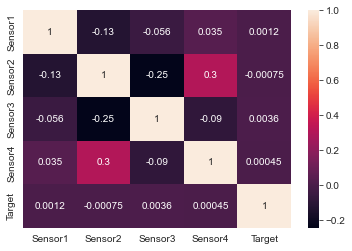

In [ ]:
#Correlation check
#Now lets check if some of the sensors are correlated
corr = dataset.corr()
sns.heatmap(corr,annot=True)

From above We can see strongly correlated group of sensors

In [ ]:
#CHECKING normality for the sensors columns

array([[<AxesSubplot:title={'center':'Sensor1'}>,
        <AxesSubplot:title={'center':'Sensor2'}>],
       [<AxesSubplot:title={'center':'Sensor3'}>,
        <AxesSubplot:title={'center':'Sensor4'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

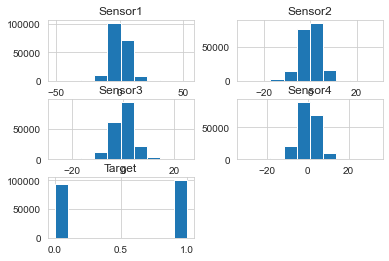

In [ ]:
dataset.hist()

Text(0.5, 0.98, 'Normality check over the sensors')

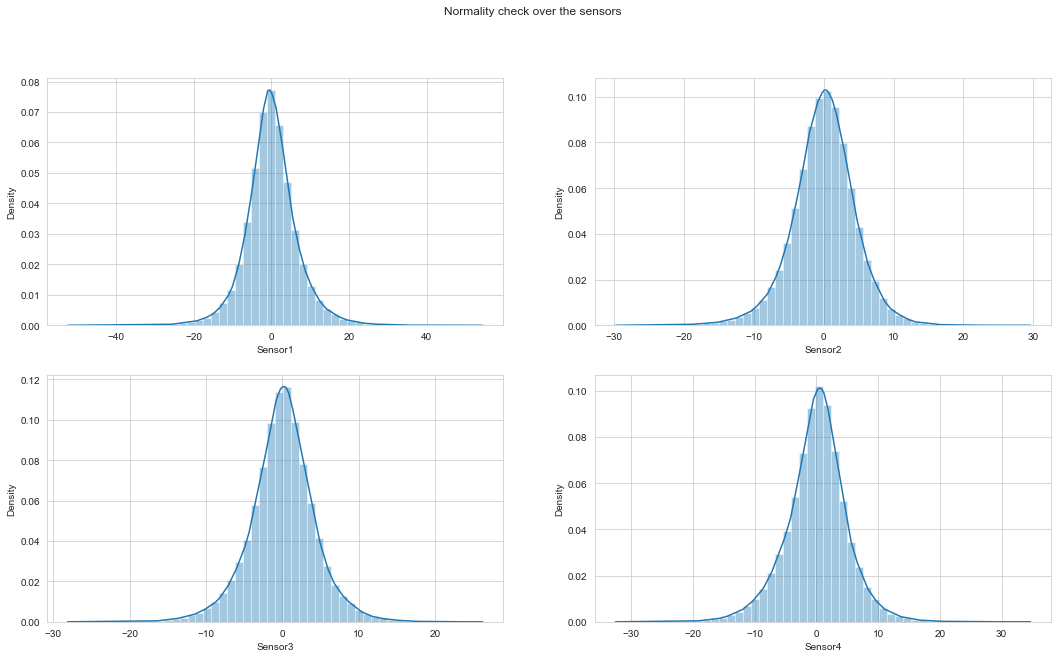

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.distplot(dataset['Sensor1'],ax=axes[0,0],kde=True)
sns.distplot(dataset['Sensor2'],ax=axes[0,1],kde=True)
sns.distplot(dataset['Sensor3'],ax=axes[1,0],kde=True)
sns.distplot(dataset['Sensor4'],ax=axes[1,1],kde=True)
fig.suptitle('Normality check over the sensors')        

 By looking at the above histogram and normality distribution graphs we can see clearly all the sensosrs are well normally  distributed and also we can see there is no any skewness present in the data

# Test-Train Split

since the dataset is very large ,just taking sample of 2000 dataset from our dataframe to analyze and build a model

In [ ]:
sample_df=dataset[1:2000]

In [ ]:
sample_df.shape

(1999, 5)

In [ ]:
#checking whether the target column is having equal number of classes or not
sample_df['Target'].value_counts()

0    1000
1     999
Name: Target, dtype: int64

Text(0.5, 0.98, 'Normality check over the sensors')

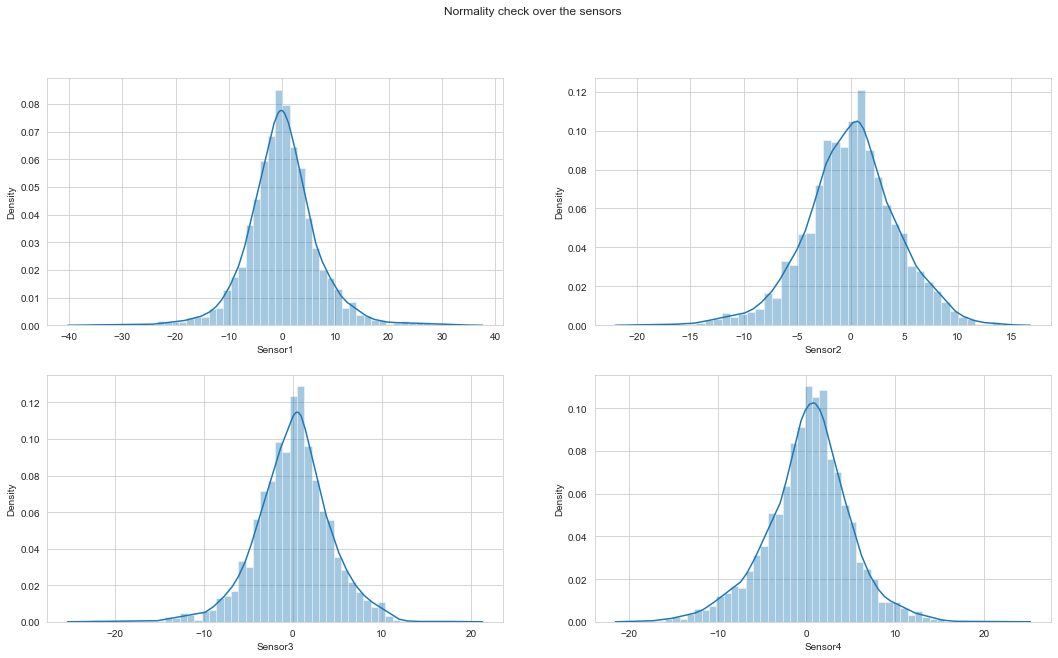

In [ ]:
#CHECKING normality for the sensors columns of sample data
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.distplot(sample_df['Sensor1'],ax=axes[0,0],kde=True)
sns.distplot(sample_df['Sensor2'],ax=axes[0,1],kde=True)
sns.distplot(sample_df['Sensor3'],ax=axes[1,0],kde=True)
sns.distplot(sample_df['Sensor4'],ax=axes[1,1],kde=True)
fig.suptitle('Normality check over the sensors')    

By looking at the above histogram and normality distribution graphs we can see clearly all the sensosrs columns of our sample data are well normally  distributed and also we can see there is no any skewness present in the data

# Test-Train Split

In [ ]:
# Putting feature variable to X
X = sample_df.drop(['Target'], axis=1)

In [ ]:
# Putting response variable to y
y = sample_df['Target']

In [ ]:
# Splitting the data into train and test
x_train,x_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [ ]:
#cheking dimensions of the train and test datasets
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1399, 4) (1399,)
(600, 4) (600,)


# Model Building

# Model 1.Logistic Regression 

Logistic regression is applied to predict the categorical dependent variable. It's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1. The predicted probability or output of logistic regression can be either one of them, and there's no middle ground.

In [ ]:
#initializing the logistic regression function
logreg = LogisticRegression()

In [ ]:
#fitting the logistic regression on train dataset
model1=logreg.fit(x_train,y_train)

In [ ]:
# Getting the predicted values on the train set
y_train_pred=logreg.predict(x_train)

In [ ]:
y_train_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

Evaluation Metris function on training dataset

In [ ]:
#Creating a dataframe with the actual Target values and the predicted train values
y_train_predict_final = pd.DataFrame({'Target':y_train.values,'Target_Prob':y_train_pred})

In [ ]:
y_train_predict_final

,Target,Target_Prob
0,0,0
1,1,0
2,0,0
3,1,0
4,1,0
...,...,...
1394,1,0
1395,1,0
1396,1,1
1397,1,1


checking Evaluation Metris functions on training dataset

# Evaluation Metris function

In [ ]:
def eval_metrics(target,prob,threshold):
        """ target =y_yest,prob=logistic.predict(X_test),Threshold =Cutoff Threshold """
        data=pd.DataFrame()
        data['pred_proba'] = pd.Series(prob)
        data['pred'] = data['pred_proba'].map(lambda x: 1.0 if x > threshold else 0.0)
        accuracy=metrics.accuracy_score(target,data['pred'])
        precision= metrics.precision_score(target,data['pred'])
        recall= metrics.recall_score(target,data['pred'])
        f1_score = metrics.f1_score(target,data['pred'])
        roc_auc = metrics.roc_auc_score(target,data['pred'])
        fbeta_score=metrics.fbeta_score(target,data['pred'],beta=0.5)
        return(accuracy,precision,recall,f1_score,roc_auc,fbeta_score)

In [ ]:
eval_metrics(y_train,y_train_pred,threshold=0.5)

(0.5325232308791994,
 0.5325884543761639,
 0.41509433962264153,
 0.466557911908646,
 0.530786606431039,
 0.5040535777229468)

By looking at the accuracy score of our training dataset, model performance of logistic regression is not much great.Since accuarcy score and other metrics is very low for training dataset only.
As mentioned above we are not concentrating on only one metric but also taking into account other important metrics that helps in better interpretation and decision making on a model's performance.

In [ ]:
#lets predict on test data accuracy ,to check whether our model is facing underfiiting situation
y_test_pred=logreg.predict(x_test)

In [ ]:
eval_metrics(y_test,y_test_pred,threshold=0.5)

(0.4683333333333333,
 0.4801762114537445,
 0.35161290322580646,
 0.4059590316573557,
 0.4723581757508343,
 0.4474548440065682)

In [ ]:
#yes by looking the performance of both training and testing data metrics results,we can see that logestic regression is
#not giving the better results on both test and train datasets

good accuracy in machine learning is subjective.Usually,anything greater than 70% is a great model performance.
Hence we can move into Other Machine Learning Models and ensures that we are not concentrating on only one metric but also taking into account other important metrics that helps in better interpretation and decision making on a model's performance.

# BUILDING VARIOUS MACHINE LEARNING MODELS  AND CHECKING THE PERFORMANCE OF EACH MODELS.
Model building:
1.Logistic Regression

2.Support vector machine(SVM)

3.Naive Bayes

4.Random Forest Classifier

5.Ada Boost

6.Gradient Boosting




In [ ]:
#defining the model diefination
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=0)))
models.append(("SVM",SVC(C=1.0,kernel='rbf',gamma='scale',probability=True,random_state=0)))
models.append(("Naive Bayes",GaussianNB()))
models.append(("Random Forest",RandomForestClassifier(random_state=10)))
models.append(('Ada Boost', AdaBoostClassifier(random_state=0,base_estimator=RandomForestClassifier(random_state=0,n_estimators=10))))
models.append(("GBM",GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, criterion='friedman_mse', max_depth=5, random_state=10)))

In [ ]:
models

[('Logistic Regression', LogisticRegression(random_state=0)),
 ('SVM', SVC(probability=True, random_state=0)),
 ('Naive Bayes', GaussianNB()),
 ('Random Forest', RandomForestClassifier(random_state=10)),
 ('Ada Boost',
  AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10,
                                                           random_state=0),
                     random_state=0)),
 ('GBM',
  GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=10))]

# Hyper Parameter Tuning function(Grisearch CV)

In [ ]:
pram_grid = {
        
            'Logistic Regression': {'penalty': ('l1', 'l2')},

            'Naive Bayes':{},
        
            'Random Forest': {'n_estimators' : [20,50,100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [2,4,10],
            'max_features':[2,4]},
                
            'SVM': {'kernel': ['rbf'],
                'gamma':[0.1,0.2,0.3,0.4,0.5]},
    
            'Ada Boost':{},
            
            'xgboost':{
   
                'learning_rate':[1,0.5,0.1,0.01,0.001],
                'max_depth': [2,4,10],
                'n_estimators':[10,30,50]},
            
            'GBM' : {
                "n_estimators":[10,30,50],
                "loss":["deviance","exponential"],
                "learning_rate": [0.2, 0.3, 0.4,0.6, 0.7,0.9],
                "max_depth":[3, 5, 8],
                "max_features":["log2","sqrt"],
                "criterion": ["friedman_mse",  "mae"],
                "subsample":[0.2,0.3,0.5,1] }
            }

In [ ]:
#Param grid in hyperparameter tuning should follow the same order of model List.Creating fucntion for hyperparameter tuning
def Hyper_parameter_tuning(name,model,X_train,y_train):
    grid_results = GridSearchCV(model, pram_grid[name],scoring='f1', cv = 3)
    grid_results.fit(X_train, y_train)
    print("Best Score",grid_results.best_score_)
    print("Best parameters",grid_results.best_params_)

# Main Model Building Function

In [ ]:
def Model_Building_Phase(dataset,target_column,models_list,th,gridsearch=False,cv_validation=False):
    # defining the fuction to AUtomate modle Building
     #Independent and Dependent Variabls
    X=dataset.drop([target_column],axis=1)
    Y=dataset[[target_column]]
    
    #Test and train split
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
   
   
    # fitting Model
    col_names = ['Algorithm', 'Accuracy','Precison','Recall','f1-score','AUC-ROC','fbeta_score']
    results_final = pd.DataFrame(columns=col_names)
    i = 0
    for name,model in models_list:
        
        model.fit(X_train, y_train)
        # predictions on testing data 
        pred_test = model.predict(X_test)
       
        #Evaluation Metrics for the model built
        accuracy,precision,recall,f1_score,roc_auc,fbeta_score=eval_metrics(y_test,pred_test,th)
        results_final.loc[i]=[name,accuracy,precision,recall,f1_score,roc_auc,fbeta_score]
        i += 1

        # Grid Search 
        if gridsearch:
            Hyper_parameter_tuning(name,model,X_train,y_train)
                            
        #Applying k-Fold Cross Validation           
        if cv_validation:
            score_cv = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10,scoring='f1')
            print(" K fold Cross validation scores",score_cv)
            print("Mean of K fold cross validation ",score_cv.mean())
       
   
    return(results_final)
        

In [ ]:
Model_Building_Phase(sample_df,'Target', models, th=0.5, gridsearch=False, cv_validation=False)

,Algorithm,Accuracy,Precison,Recall,f1-score,AUC-ROC,fbeta_score
0,Logistic Regression,0.500000,0.491620,0.598639,0.539877,0.501934,0.509849
1,SVM,0.646667,0.699029,0.489796,0.576000,0.643591,0.644007
2,Naive Bayes,0.600000,0.626168,0.455782,0.527559,0.597172,0.582609
3,Random Forest,0.613333,0.619231,0.547619,0.581227,0.612045,0.603448
4,Ada Boost,0.606667,0.596667,0.608844,0.602694,0.606709,0.599063
5,GBM,0.615000,0.637555,0.496599,0.558317,0.612678,0.603306


From the above all the model results ,we can see that model performance for Random Forest classifier is good.Lets do Hyperparameter tuning on Random forest classifier

In [ ]:
#training on only random forest classifier
models1 = []
models1.append(("Random Forest",RandomForestClassifier(random_state=10)))


In [ ]:
#hyperparameter Tuning by using GridSearchcv
Model_Building_Phase(sample_df1,'Target', models1, th=0.5, gridsearch=True, cv_validation=False)

Best Score 0.5709146854634257
Best parameters {'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'n_estimators': 50}


,Algorithm,Accuracy,Precison,Recall,f1-score,AUC-ROC,fbeta_score
0,Random Forest,0.590667,0.615152,0.530026,0.569425,0.591989,0.596007


In [ ]:
#lets train our random forest classifier with cross validation
Model_Building_Phase(sample_df1,'Target', models1, th=0.5, gridsearch=False, cv_validation=True)

 K fold Cross validation scores [0.58125    0.50632911 0.575      0.59509202 0.64576803 0.58858859
 0.58309038 0.56790123 0.62650602 0.60567823]
Mean of K fold cross validation  0.5875203623242405


,Algorithm,Accuracy,Precison,Recall,f1-score,AUC-ROC,fbeta_score
0,Random Forest,0.590667,0.615152,0.530026,0.569425,0.591989,0.596007


In [ ]:
#lets train our random forest classifier with best parameter obtained from hyperparameter function
model_final = RandomForestClassifier(n_estimators=50,max_depth=5 ,criterion='gini', max_features=4)

In [ ]:
#fit a trained random forest classifier on our training dataset
model_final.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=50)

In [ ]:
# Getting the predicted values on the train set
y_train_pred1=model_final.predict(x_train)

In [ ]:
#evaluating training performance metrics
eval_metrics(y_train,y_train_pred1,threshold=0.5)

(0.7033595425303788,
 0.8567708333333334,
 0.47750362844702465,
 0.6132339235787511,
 0.7000194198573152,
 0.7393258426966292)

In [ ]:
# Getting the predicted values on the train set
y_test_pred=model_final.predict(x_test)

In [ ]:
#evaluating training performance metrics
eval_metrics(y_test,y_test_pred,threshold=0.5)

(0.6183333333333333,
 0.7288135593220338,
 0.4161290322580645,
 0.5297741273100616,
 0.6253058954393771,
 0.6335952848722985)

In [ ]:
sample_df1=dataset[:5000]

In [ ]:
sample_df1.shape

(5000, 5)